## Modeling things manually

### Modeling 1 Neuron with 3 inputs


In [29]:
inputs = [ 1 , 2, 3]
weights = [0.2 , 0.8 , -0.5]
bias = 2 

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]* weights[2] + bias

output

2.3

### Modeling 3 Neuron with 4 inputs  

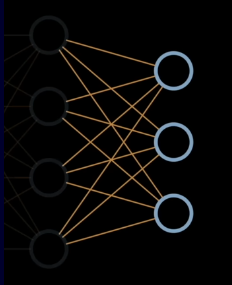


In [30]:
inputs= [1 , 2, 3, 2.5 ]

# Weights 

weights1 = [0.2 , 0.8 , -0.5 , 1.0] # these are all the weights going into neuron output 1 
weights2 = [0.5 , -0.91 , 0.26 , -0.5] # all the weights going into neuron output 2
weights3 = [-0.26 , -0.27 , 0.17 , 0.87] # all the weights going into neuron output 3

# Biases 
bias1 = 2 
bias2 = 3 
bias3 = 0.5 

output = [ inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
           inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
            inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3]

output

[4.8, 1.21, 2.385]

#### Creating a more dynamic code, so we dont have to write this entire code manually 

In [31]:
inputs = [1 , 2, 3, 2.5 ] 

weights = [[0.2 , 0.8 , -0.5 , 1.0],
           [0.5 , -0.91 , 0.26 , -0.5],
           [-0.26 , -0.27 , 0.17 , 0.87]]

biases = [ 2 , 3, 0.5 ]

In [32]:
# We will be using zip function to calculate this. 
layer_output = []

for n_weight , n_bias in zip ( weights , biases ) :
    
    n_output = 0 

    for weight , inp  in zip ( n_weight , inputs  ) :
        
        n_output += weight * inp

    n_output+= n_bias
    layer_output.append (n_output)

layer_output

[4.8, 1.21, 2.385]

#### Repeating the same thing using Dot Product  
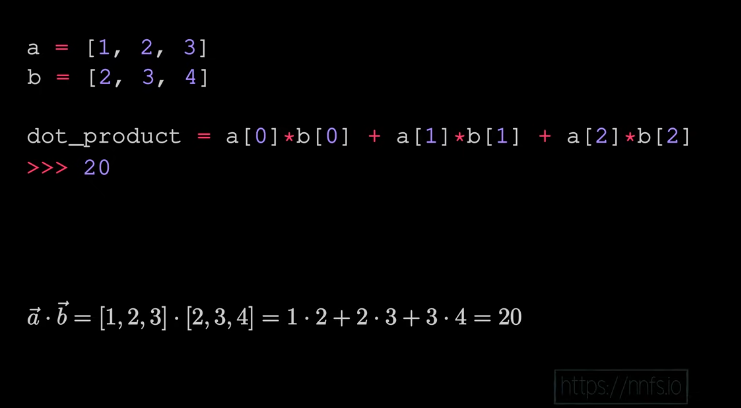

In [33]:
## Dot product of inputs with a layer of neurons

inputs = [1, 2, 3, 2.5]   # Input features (4 values)


# Each sublist in 'weights' represents the weights for one neuron in the layer
# weights = [n_neurons, n_inputs]


weights = [[0.2, 0.8, -0.5, 1.0],      # Weights for neuron 1
           [0.5, -0.91, 0.26, -0.5],   # Weights for neuron 2
           [-0.26, -0.27, 0.17, 0.87]] # Weights for neuron 3


# Bias values for each neuron (added after weighted sum)
bias = [2, 3, 0.5]


# Matrix multiplication: (n_neurons * n_inputs) · (n_inputs)
# Result shape = (n_neurons,)

output = np.dot(weights, inputs) + bias

## Numpy Broadcasting:
# Broadcasting allows NumPy to automatically expand arrays with different shapes
# so that arithmetic operations can be performed without explicitly reshaping.
# Example: [2, 2] + [1] → [2, 2] + [1, 1] = [3, 3]

"""
Shape Explanation:

weights shape = (3, 4)   → 3 neurons, each with 4 weights
input   shape = (4,)     → 4 input features
bias    shape = (3,)     → 3 bias values, one for each neuron

Dot product:

      (3 * 4)   ·   (4,)   →   (3,)

      [Neuron1_w1, Neuron1_w2, Neuron1_w3, Neuron1_w4]   [x1]
      [Neuron2_w1, Neuron2_w2, Neuron2_w3, Neuron2_w4] · [x2]  → [Neuron1_output]
      [Neuron3_w1, Neuron3_w2, Neuron3_w3, Neuron3_w4]   [x3]  → [Neuron2_output]
                                                         [x4]  → [Neuron3_output]

Then add bias → final output shape = (3,)

Why not np.dot(input, weights)?
input shape   = (4,)
weights shape = (3, 4)

This would be (1 * 4) · (3 * 4), which is invalid since inner dimensions don't match.
"""
output

array([4.8  , 1.21 , 2.385])

### Taking in Multiple inputs, ( Like real data )

In [50]:
import numpy as np

inputs = [[1 , 2, 3, 2.5 ],
         [2.0 , 5.0 , -1.0 , 2.0 ],
         [-1.5 , 2.7 , 3.3 , -0.8]]  


weights = [[0.2 , 0.8 , -0.5 , 1.0],
           [0.5 , -0.91 , 0.26 , -0.5],
           [-0.26 , -0.27 , 0.17 , 0.87]]



biases = [ 2 , 3, 0.5 ]


# we encounter an error, because we have shape mismatch, 

# 3*4 and 3*4

# Calculating once for each input 

output = []
for i in inputs :
    
    i_output = np.dot ( weights , i ) + biases

    output.append (i_output)

print(output)



# Calcuating all output at once 

batch_output = np.dot ( inputs , np.transpose(weights) ) + biases
batch_output


[array([4.8  , 1.21 , 2.385]), array([ 8.9 , -1.81,  0.2 ]), array([1.41 , 1.051, 0.026])]


array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])